In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(10886, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


There are no missing data points. 

**Data Fields**

datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather -
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable) = Casual + Registered

In [6]:
train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8313,2012-07-07 18:00:00,3,0,0,1,38.54,41.665,29,6.0032,83,194,277
3167,2011-08-01 21:00:00,3,0,1,1,28.70,32.575,70,16.9979,42,178,220
854,2011-02-19 01:00:00,1,0,0,1,18.86,22.725,14,27.9993,10,21,31
7405,2012-05-07 22:00:00,2,0,1,2,22.14,25.760,45,16.9979,26,147,173
8864,2012-08-11 17:00:00,3,0,0,3,30.34,34.850,66,23.9994,220,292,512
10853,2012-12-18 15:00:00,4,0,1,1,18.86,22.725,44,32.9975,28,218,246
9865,2012-10-15 10:00:00,4,0,1,2,24.60,29.545,73,26.0027,43,125,168
1191,2011-03-14 09:00:00,1,0,1,1,13.12,15.150,53,22.0028,13,127,140
3582,2011-08-19 04:00:00,3,0,1,1,26.24,28.790,83,0.0000,1,7,8
10615,2012-12-08 17:00:00,4,0,0,1,15.58,19.695,87,8.9981,77,268,345


In [7]:
data = pd.concat([train, test], sort = False)

In [8]:
data.shape

(17379, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [10]:
is_train = np.zeros(data.shape[0])

In [11]:
is_train[range(train.shape[0])] = 1

In [12]:
is_train

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
data['is_train'] = is_train.astype(int)

In [14]:
data.is_train.value_counts()

1    10886
0     6493
Name: is_train, dtype: int64

In [15]:
data[10883:10886+3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_train
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0,1
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4.0,84.0,88.0,1
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,0


In [16]:
data['year'] = pd.to_datetime(data['datetime']).dt.year
data['month'] = pd.to_datetime(data['datetime']).dt.month
data['hour'] = pd.to_datetime(data['datetime']).dt.hour
data['weekday'] = pd.to_datetime(data['datetime']).dt.dayofweek

In [17]:
data['seasonName'] = data.season.map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })

In [18]:
data['weekdayName'] = data.weekday.map({0: 'Monday', 1: 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 :'Friday', 5: 'Saturday', 6: 'Sunday'})

In [19]:
seed = 10
np.random.seed(seed)
data.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_train,year,month,hour,weekday,seasonName,weekdayName
6557,2012-03-10 11:00:00,1,0,0,1,12.30,13.635,33,22.0028,56.0,218.0,274.0,1,2012,3,11,5,Spring,Saturday
851,2011-04-24 11:00:00,2,0,0,1,27.06,31.060,65,8.9981,NaN,NaN,NaN,0,2011,4,11,6,Summer,Sunday
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,35.0,165.0,200.0,1,2011,11,10,5,Winter,Saturday
2853,2011-07-07 19:00:00,3,0,1,1,33.62,38.635,52,19.0012,79.0,286.0,365.0,1,2011,7,19,3,Fall,Thursday
3697,2011-09-04 23:00:00,3,0,0,2,29.52,34.090,70,11.0014,46.0,58.0,104.0,1,2011,9,23,6,Fall,Sunday
7305,2012-05-03 18:00:00,2,0,1,1,29.52,33.335,58,8.9981,64.0,642.0,706.0,1,2012,5,18,3,Summer,Thursday
5036,2012-07-27 16:00:00,3,0,1,1,34.44,38.635,47,15.0013,NaN,NaN,NaN,0,2012,7,16,4,Fall,Friday
6198,2012-11-30 15:00:00,4,0,1,2,17.22,21.210,38,7.0015,NaN,NaN,NaN,0,2012,11,15,4,Winter,Friday
4279,2012-04-30 03:00:00,2,0,1,1,16.40,20.455,76,11.0014,NaN,NaN,NaN,0,2012,4,3,0,Summer,Monday
8756,2012-08-07 05:00:00,3,0,1,1,28.70,33.335,79,7.0015,3.0,33.0,36.0,1,2012,8,5,1,Fall,Tuesday


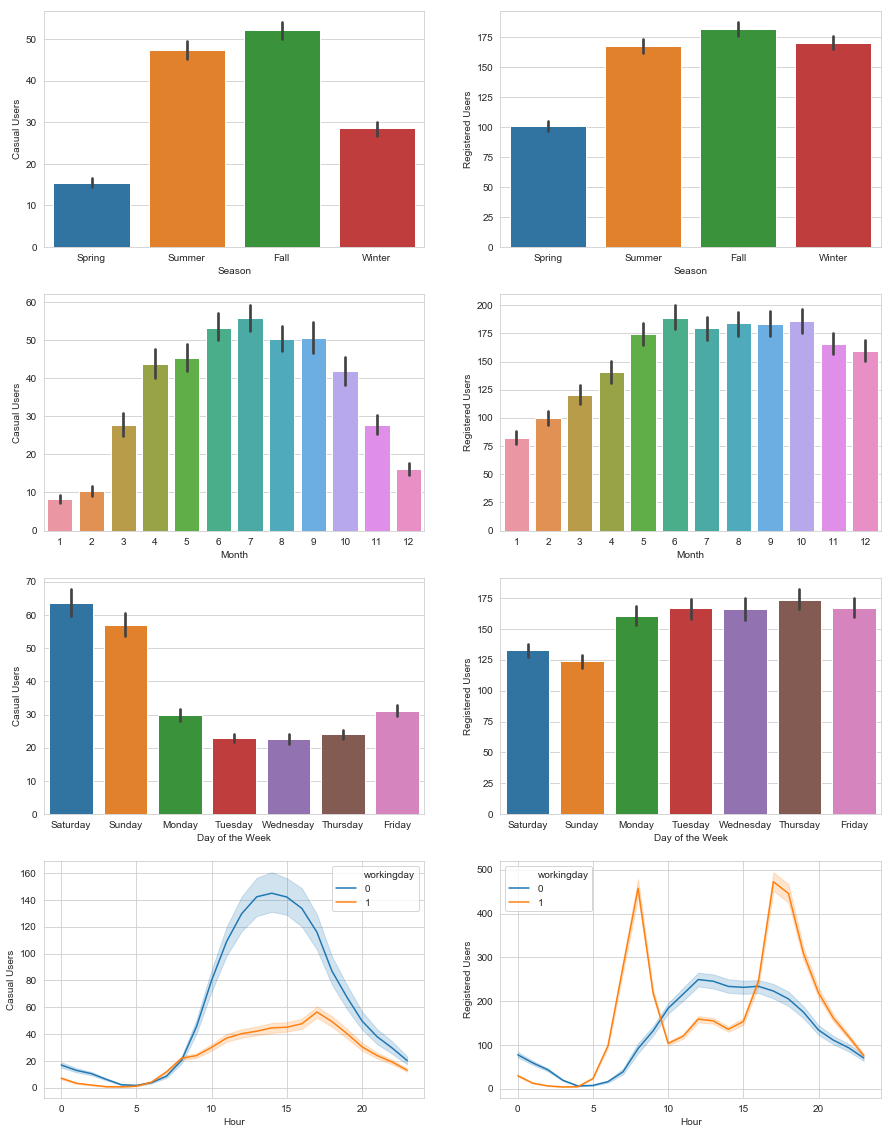

In [20]:
fig, ax = plt.subplots(nrows = 4, ncols= 2)
fig.set_size_inches(15,20)
sns.barplot(x='seasonName', y = 'casual', data = data[data['is_train']==1], ax = ax[0][0])
ax[0][0].set(xlabel = 'Season', ylabel = 'Casual Users')
sns.barplot(x='seasonName', y = 'registered', data = data[data['is_train']==1], ax = ax[0][1])
ax[0][1].set(xlabel = 'Season', ylabel = 'Registered Users')
sns.barplot(x='month', y = 'casual', data = data[data['is_train']==1], ax = ax[1][0])
ax[1][0].set(xlabel = 'Month', ylabel = 'Casual Users')
sns.barplot(x='month', y = 'registered', data = data[data['is_train']==1], ax = ax[1][1])
ax[1][1].set(xlabel = 'Month', ylabel = 'Registered Users')
sns.barplot(x='weekdayName', y = 'casual', data = data[data['is_train']==1], ax = ax[2][0])
ax[2][0].set(xlabel = 'Day of the Week', ylabel = 'Casual Users')
sns.barplot(x='weekdayName', y = 'registered', data = data[data['is_train']==1], ax = ax[2][1])
ax[2][1].set(xlabel = 'Day of the Week', ylabel = 'Registered Users')
sns.lineplot(x='hour', y = 'casual', hue = 'workingday', data = data[data['is_train']==1], ax = ax[3][0])
ax[3][0].set(xlabel = 'Hour', ylabel = 'Casual Users')
sns.lineplot(x='hour', y = 'registered', hue = 'workingday', data = data[data['is_train']==1], ax = ax[3][1])
ax[3][1].set(xlabel = 'Hour', ylabel = 'Registered Users')


plt.show()

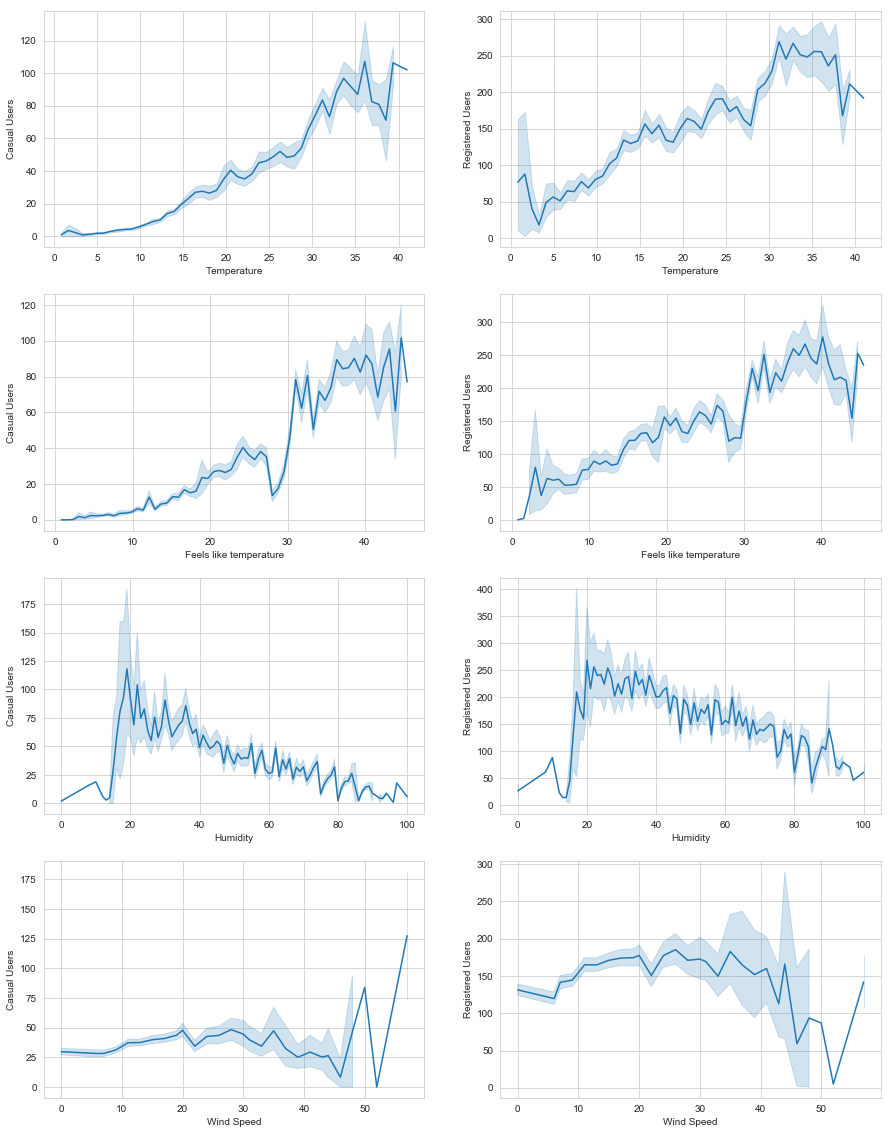

In [22]:
fig, ax = plt.subplots(nrows = 4, ncols= 2)
fig.set_size_inches(15,20)
sns.lineplot(x='temp', y = 'casual', data = data[data['is_train']==1], ax = ax[0][0])
ax[0][0].set(xlabel = 'Temperature', ylabel = 'Casual Users')
sns.lineplot(x='temp', y = 'registered', data = data[data['is_train']==1], ax = ax[0][1])
ax[0][1].set(xlabel = 'Temperature', ylabel = 'Registered Users')
sns.lineplot(x='atemp', y = 'casual', data = data[data['is_train']==1], ax = ax[1][0])
ax[1][0].set(xlabel = 'Feels like temperature', ylabel = 'Casual Users')
sns.lineplot(x='atemp', y = 'registered', data = data[data['is_train']==1], ax = ax[1][1])
ax[1][1].set(xlabel = 'Feels like temperature', ylabel = 'Registered Users')
sns.lineplot(x='humidity', y = 'casual', data = data[data['is_train']==1], ax = ax[2][0])
ax[2][0].set(xlabel = 'Humidity', ylabel = 'Casual Users')
sns.lineplot(x='humidity', y = 'registered', data = data[data['is_train']==1], ax = ax[2][1])
ax[2][1].set(xlabel = 'Humidity', ylabel = 'Registered Users')
sns.lineplot(x='windspeed', y = 'casual', data = data[data['is_train']==1], ax = ax[3][0])
ax[3][0].set(xlabel = 'Wind Speed', ylabel = 'Casual Users')
sns.lineplot(x='windspeed', y = 'registered', data = data[data['is_train']==1], ax = ax[3][1])
ax[3][1].set(xlabel = 'Wind Speed', ylabel = 'Registered Users')


plt.show()